<a href="https://colab.research.google.com/github/akarshpyr/Python-codes/blob/main/Case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV,train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from pandas.plotting import scatter_matrix

In [2]:
dataset = pd.read_csv('/content/sonar.all-data.csv', header=None)

In [3]:
dataset


,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [4]:
dataset = pd.read_csv('/content/sonar.all-data.csv')

In [5]:
dataset

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
203,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
204,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
205,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [6]:
dataset = pd.read_csv('/content/sonar.all-data.csv', header=None)

In [7]:
dataset.shape

(208, 61)

In [8]:
dataset.head(20)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
5,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
6,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,...,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103,R
7,0.0519,0.0548,0.0842,0.0319,0.1158,0.0922,0.1027,0.0613,0.1465,0.2838,...,0.0081,0.0120,0.0045,0.0121,0.0097,0.0085,0.0047,0.0048,0.0053,R
8,0.0223,0.0375,0.0484,0.0475,0.0647,0.0591,0.0753,0.0098,0.0684,0.1487,...,0.0145,0.0128,0.0145,0.0058,0.0049,0.0065,0.0093,0.0059,0.0022,R
9,0.0164,0.0173,0.0347,0.0070,0.0187,0.0671,0.1056,0.0697,0.0962,0.0251,...,0.0090,0.0223,0.0179,0.0084,0.0068,0.0032,0.0035,0.0056,0.0040,R


In [9]:
pd.set_option('display.max_rows',500)
dataset.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
31    float64
32    float64
33    float64
34    float64
35    float64
36    float64
37    float64
38    float64
39    float64
40    float64
41    float64
42    float64
43    float64
44    float64
45    float64
46    float64
47    float64
48    float64
49    float64
50    float64
51    float64
52    float64
53    float64
54    float64
55    float64
56    float64
57    float64
58    float64
59    float64
60     object
dtype: object

In [10]:
dataset.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [11]:
pd.set_option('precision',3)
dataset.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000,2.080e+02,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,...,208.000,2.080e+02,2.080e+02,208.000,2.080e+02,2.080e+02,2.080e+02,2.080e+02,2.080e+02,2.080e+02
mean,0.029,3.844e-02,0.044,0.054,0.075,0.105,0.122,0.135,0.178,0.208,...,0.016,1.342e-02,1.071e-02,0.011,9.290e-03,8.222e-03,7.820e-03,7.949e-03,7.941e-03,6.507e-03
std,0.023,3.296e-02,0.038,0.047,0.056,0.059,0.062,0.085,0.118,0.134,...,0.012,9.634e-03,7.060e-03,0.007,7.088e-03,5.736e-03,5.785e-03,6.470e-03,6.181e-03,5.031e-03
min,0.002,6.000e-04,0.002,0.006,0.007,0.010,0.003,0.005,0.007,0.011,...,0.000,8.000e-04,5.000e-04,0.001,6.000e-04,4.000e-04,3.000e-04,3.000e-04,1.000e-04,6.000e-04
25%,0.013,1.645e-02,0.019,0.024,0.038,0.067,0.081,0.080,0.097,0.111,...,0.008,7.275e-03,5.075e-03,0.005,4.150e-03,4.400e-03,3.700e-03,3.600e-03,3.675e-03,3.100e-03
50%,0.023,3.080e-02,0.034,0.044,0.062,0.092,0.107,0.112,0.152,0.182,...,0.014,1.140e-02,9.550e-03,0.009,7.500e-03,6.850e-03,5.950e-03,5.800e-03,6.400e-03,5.300e-03
75%,0.036,4.795e-02,0.058,0.065,0.100,0.134,0.154,0.170,0.233,0.269,...,0.021,1.673e-02,1.490e-02,0.015,1.210e-02,1.058e-02,1.043e-02,1.035e-02,1.033e-02,8.525e-03
max,0.137,2.339e-01,0.306,0.426,0.401,0.382,0.373,0.459,0.683,0.711,...,0.100,7.090e-02,3.900e-02,0.035,4.470e-02,3.940e-02,3.550e-02,4.400e-02,3.640e-02,4.390e-02


In [12]:
dataset.groupby(60).size()

60
M    111
R     97
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc662b36290>,
      dtype=object)

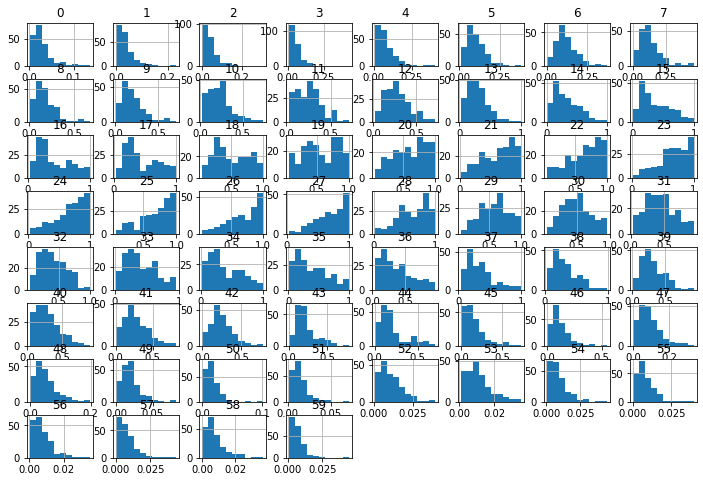

In [13]:
dataset.hist(figsize=(12,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc660ca9110>,
      dtype=object)

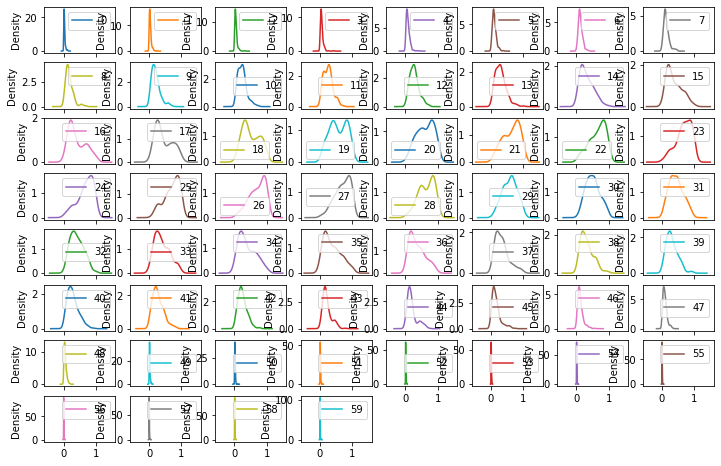

In [14]:
dataset.plot(kind='density', figsize=(12,8), layout=(8,8),subplots=True)

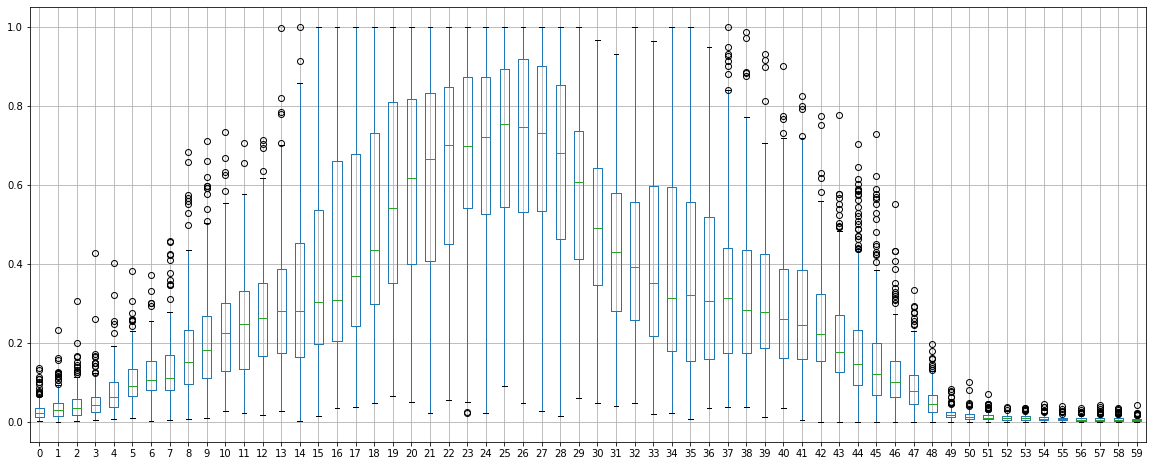

In [15]:
dataset.boxplot(figsize=(20,8))

In [16]:
dataset.corr()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,1.000,0.736,0.572,0.491,3.448e-01,0.239,0.261,0.356,0.353,0.318,...,2.544e-01,0.355,3.117e-01,0.322,3.121e-01,0.221,0.314,0.368,0.357,0.347
1,0.736,1.000,0.780,0.607,4.197e-01,0.332,0.279,0.335,0.317,0.271,...,3.205e-01,0.435,3.461e-01,0.384,3.802e-01,0.262,0.280,0.353,0.352,0.359
2,0.572,0.780,1.000,0.782,5.461e-01,0.346,0.190,0.238,0.253,0.220,...,2.381e-01,0.394,3.329e-01,0.367,2.897e-01,0.288,0.381,0.334,0.425,0.374
3,0.491,0.607,0.782,1.000,7.269e-01,0.353,0.246,0.247,0.247,0.238,...,1.747e-01,0.375,3.648e-01,0.334,2.850e-01,0.281,0.340,0.345,0.420,0.401
4,0.345,0.420,0.546,0.727,1.000e+00,0.597,0.335,0.204,0.178,0.183,...,1.159e-01,0.267,3.150e-01,0.205,1.965e-01,0.199,0.219,0.239,0.291,0.254
5,0.239,0.332,0.346,0.353,5.971e-01,1.000,0.703,0.472,0.328,0.289,...,1.718e-01,0.252,1.624e-01,0.164,1.335e-01,0.167,0.161,0.204,0.221,0.178
6,0.261,0.279,0.190,0.246,3.354e-01,0.703,1.000,0.676,0.471,0.425,...,1.842e-01,0.144,4.640e-02,0.163,1.955e-01,0.174,0.186,0.243,0.184,0.222
7,0.356,0.335,0.238,0.247,2.040e-01,0.472,0.676,1.000,0.779,0.653,...,2.607e-01,0.219,1.024e-01,0.234,2.396e-01,0.277,0.267,0.288,0.194,0.146
8,0.353,0.317,0.253,0.247,1.779e-01,0.328,0.471,0.779,1.000,0.877,...,1.749e-01,0.208,1.054e-01,0.203,1.793e-01,0.233,0.194,0.232,0.097,0.095
9,0.318,0.271,0.220,0.238,1.832e-01,0.289,0.425,0.653,0.877,1.000,...,1.671e-01,0.166,9.754e-02,0.147,1.753e-01,0.152,0.140,0.212,0.058,0.097


<function matplotlib.pyplot.show>

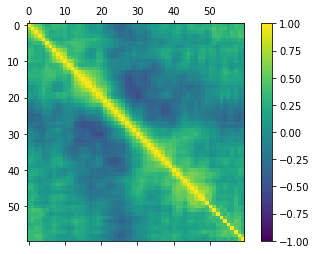

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1,vmax=1,interpolation='none')
fig.colorbar(cax)
plt.show


In [18]:
array = dataset.values
X = array[:,0:60].astype(float)
Y = array[:,60]

In [19]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=4)

In [20]:
num_folds = 10
seed = 4
scoring ='accuracy'
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
results=[]
names=[]
for name,model in models:
  kfold = KFold(n_splits=num_folds,random_state=None)
  cv_results = cross_val_score(model,X_train,Y_train,cv=kfold,scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name,cv_results.mean(),cv_results.std())
  print(msg)

LR: 0.747059 (0.079190)
KNN: 0.742279 (0.104174)
CART: 0.655515 (0.089317)
NB: 0.692279 (0.155024)
SVM: 0.772426 (0.119623)


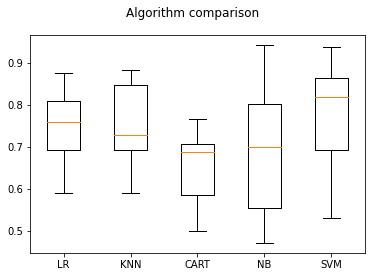

In [21]:
fig = plt.figure()
fig.suptitle('Algorithm comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [23]:
pipelines = []
pipelines.append(('ScaledLR',Pipeline([('Scaler',StandardScaler()),('LR',LogisticRegression())])))
pipelines.append(('ScaledKNN',Pipeline([('Scaler',StandardScaler()),('KNN',KNeighborsClassifier())])))
pipelines.append(('ScaledCART',Pipeline([('Scaler',StandardScaler()),('CART',DecisionTreeClassifier())])))
pipelines.append(('ScaledNB',Pipeline([('Scaler',StandardScaler()),('NB',GaussianNB())])))
pipelines.append(('ScaledSVM',Pipeline([('Scaler',StandardScaler()),('SVM',SVC())])))
results = []
names = []
for name , model in pipelines:
  kfold = KFold(n_splits=10,random_state=None)
  cv_results = cross_val_score(model,X_train,Y_train,cv=kfold,scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
  print(msg)

ScaledLR: 0.711397 (0.097496)
ScaledKNN: 0.777941 (0.075385)
ScaledCART: 0.650000 (0.072171)
ScaledNB: 0.692279 (0.155024)
ScaledSVM: 0.777574 (0.088926)


In [24]:
results

[array([0.88235294, 0.58823529, 0.70588235, 0.64705882, 0.58823529,
        0.76470588, 0.625     , 0.8125    , 0.6875    , 0.8125    ]),
 array([0.82352941, 0.70588235, 0.76470588, 0.76470588, 0.70588235,
        0.76470588, 0.875     , 0.75      , 0.6875    , 0.9375    ]),
 array([0.76470588, 0.58823529, 0.64705882, 0.76470588, 0.58823529,
        0.64705882, 0.6875    , 0.6875    , 0.5625    , 0.5625    ]),
 array([0.76470588, 0.52941176, 0.47058824, 0.94117647, 0.64705882,
        0.88235294, 0.5       , 0.8125    , 0.625     , 0.75      ]),
 array([0.76470588, 0.64705882, 0.70588235, 0.82352941, 0.88235294,
        0.76470588, 0.625     , 0.875     , 0.8125    , 0.875     ])]

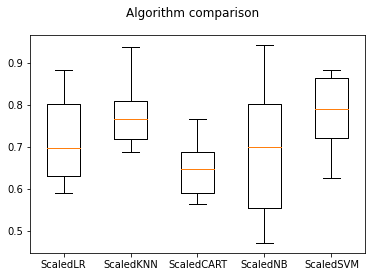

In [30]:
fig = plt.figure()
fig.suptitle('Algorithm comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [35]:
scaler = StandardScaler().fit(X_train)
rescaled = scaler.transform(X_train)
neighbors = [1,3,5,6,7,8,9,13,15,17,19]
param_grid = dict(n_neighbors = neighbors)
model = KNeighborsClassifier()
kfold = KFold(n_splits=10)
grid= GridSearchCV(estimator=model,param_grid= param_grid,scoring='accuracy',cv=kfold)
grid_results = grid.fit(rescaled,Y_train)
msg = 'Best: %f using (%s)'%(grid_results.best_score_,grid_results.best_params_)
print(msg)


Best: 0.838603 using ({'n_neighbors': 3})


In [36]:
grid_results

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 6, 7, 8, 9, 13, 15, 17, 19]},
             scoring='accuracy')

In [37]:
grid_results.best_params_

{'n_neighbors': 3}

In [38]:
grid_results.cv_results_

{'mean_fit_time': array([0.00063207, 0.00053093, 0.00054569, 0.00053258, 0.0005249 ,
        0.00052736, 0.00052605, 0.00051627, 0.00052185, 0.00052421,
        0.00053904]),
 'mean_score_time': array([0.00141857, 0.00124223, 0.00127306, 0.00128665, 0.00127344,
        0.00125201, 0.00121815, 0.00124609, 0.00122769, 0.001232  ,
        0.00137551]),
 'mean_test_score': array([0.82647059, 0.83860294, 0.76617647, 0.74779412, 0.72389706,
        0.68823529, 0.69485294, 0.72463235, 0.71286765, 0.70073529,
        0.70625   ]),
 'param_n_neighbors': masked_array(data=[1, 3, 5, 6, 7, 8, 9, 13, 15, 17, 19],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 1},
  {'n_neighbors': 3},
  {'n_neighbors': 5},
  {'n_neighbors': 6},
  {'n_neighbors': 7},
  {'n_neighbors': 8},
  {'n_neighbors': 9},
  {'n_neighbors': 13},
  {'n_neighbors': 15},
  {'n_neighb

In [42]:
means = grid_results.cv_results_['mean_test_score']
stdevs = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']
for mean , std, param in zip(means,stdevs,params):
  print('%f (%f) with %s' % (mean,std,param))


0.826471 (0.066580) with {'n_neighbors': 1}
0.838603 (0.083537) with {'n_neighbors': 3}
0.766176 (0.076524) with {'n_neighbors': 5}
0.747794 (0.061348) with {'n_neighbors': 6}
0.723897 (0.098547) with {'n_neighbors': 7}
0.688235 (0.068619) with {'n_neighbors': 8}
0.694853 (0.096405) with {'n_neighbors': 9}
0.724632 (0.096509) with {'n_neighbors': 13}
0.712868 (0.090734) with {'n_neighbors': 15}
0.700735 (0.102983) with {'n_neighbors': 17}
0.706250 (0.087256) with {'n_neighbors': 19}


In [43]:
scaler = StandardScaler().fit(X_train)
rescaled = scaler.transform(X_train)
cost = [0.1,0.3,0.4,0.5,0.7,0.9,1]
kernel = ['linear','poly','rbf','sigmoid']
param_grid = dict(C=cost,kernel=kernel)
model = SVC()
kfold = KFold(n_splits=10)
grid= GridSearchCV(estimator=model,param_grid= param_grid,scoring='accuracy',cv=kfold)
grid_results = grid.fit(rescaled,Y_train)
msg = 'Best: %f using (%s)'%(grid_results.best_score_,grid_results.best_params_)
print(msg)


Best: 0.783456 using ({'C': 0.9, 'kernel': 'rbf'})


In [44]:
means = grid_results.cv_results_['mean_test_score']
stdevs = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']
for mean , std, param in zip(means,stdevs,params):
  print('%f (%f) with %s' % (mean,std,param))

0.735662 (0.122647) with {'C': 0.1, 'kernel': 'linear'}
0.547059 (0.124651) with {'C': 0.1, 'kernel': 'poly'}
0.647059 (0.145349) with {'C': 0.1, 'kernel': 'rbf'}
0.700000 (0.143723) with {'C': 0.1, 'kernel': 'sigmoid'}
0.723162 (0.086706) with {'C': 0.3, 'kernel': 'linear'}
0.612500 (0.129161) with {'C': 0.3, 'kernel': 'poly'}
0.742279 (0.122856) with {'C': 0.3, 'kernel': 'rbf'}
0.747426 (0.111635) with {'C': 0.3, 'kernel': 'sigmoid'}
0.711397 (0.088239) with {'C': 0.4, 'kernel': 'linear'}
0.655515 (0.133330) with {'C': 0.4, 'kernel': 'poly'}
0.736397 (0.100591) with {'C': 0.4, 'kernel': 'rbf'}
0.747426 (0.105253) with {'C': 0.4, 'kernel': 'sigmoid'}
0.717647 (0.079224) with {'C': 0.5, 'kernel': 'linear'}
0.702941 (0.159338) with {'C': 0.5, 'kernel': 'poly'}
0.748529 (0.102996) with {'C': 0.5, 'kernel': 'rbf'}
0.747426 (0.098459) with {'C': 0.5, 'kernel': 'sigmoid'}
0.723529 (0.069266) with {'C': 0.7, 'kernel': 'linear'}
0.741544 (0.117083) with {'C': 0.7, 'kernel': 'poly'}
0.754044 (

In [46]:
ensembles = []
ensembles.append(('AB',AdaBoostClassifier()))
ensembles.append(('GBM',GradientBoostingClassifier()))
ensembles.append(('RAF',RandomForestClassifier()))
ensembles.append(('ETC',ExtraTreesClassifier()))
results = []
names =[]
for name, model in ensembles:
  kfold=KFold(n_splits=10)
  cv_results = cross_val_score(model, X_train,Y_train,scoring='accuracy',cv=kfold )
  results.append(cv_results)
  names.append(name)
  msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
  print(msg)
  

AB: 0.801471 (0.069582)
GBM: 0.806985 (0.071823)
RAF: 0.813603 (0.104596)
ETC: 0.837500 (0.053576)


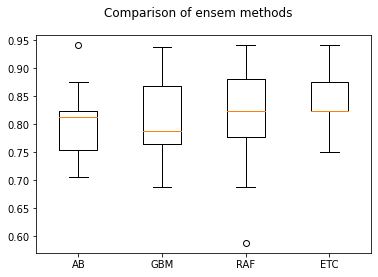

In [49]:
figure = plt.figure()
figure.suptitle('Comparison of ensem methods')
ax = figure.add_subplot(111)
ax.set_xticklabels(names)
plt.boxplot(results)
plt.show()

In [ ]:
array = dataset.values
X = array[:,0:60].astype(float)
Y = array[:,60]

In [50]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=4)


In [51]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = SVC(kernel='rbf',C=0.9)
model.fit(rescaledX,Y_train)


SVC(C=0.9)

In [52]:
model.predict(rescaledX)

array(['R', 'R', 'R', 'R', 'M', 'M', 'M', 'M', 'M', 'M', 'R', 'M', 'R',
       'M', 'M', 'R', 'R', 'R', 'R', 'R', 'M', 'R', 'R', 'R', 'R', 'M',
       'R', 'M', 'R', 'M', 'R', 'M', 'R', 'M', 'M', 'R', 'R', 'M', 'R',
       'M', 'M', 'M', 'R', 'R', 'R', 'M', 'M', 'R', 'M', 'R', 'M', 'M',
       'R', 'R', 'M', 'R', 'M', 'M', 'M', 'M', 'R', 'R', 'R', 'M', 'R',
       'R', 'R', 'R', 'R', 'M', 'R', 'R', 'M', 'M', 'M', 'M', 'M', 'R',
       'M', 'M', 'R', 'M', 'R', 'R', 'M', 'M', 'R', 'R', 'M', 'R', 'R',
       'R', 'R', 'M', 'M', 'M', 'M', 'R', 'R', 'M', 'R', 'M', 'R', 'M',
       'R', 'R', 'R', 'R', 'M', 'M', 'R', 'R', 'R', 'M', 'M', 'R', 'M',
       'M', 'R', 'M', 'M', 'M', 'R', 'M', 'M', 'R', 'M', 'M', 'M', 'M',
       'R', 'R', 'M', 'R', 'M', 'M', 'R', 'M', 'M', 'R', 'R', 'M', 'R',
       'M', 'R', 'R', 'R', 'M', 'M', 'R', 'M', 'R', 'R', 'M', 'M', 'R',
       'M', 'R', 'M', 'R', 'M', 'M', 'M', 'M', 'M', 'M'], dtype=object)

In [55]:
scaler1 = StandardScaler().fit(X_test)
rescaledXt = scaler1.transform(X_test)


In [57]:
pred = model.predict(rescaledXt)

In [58]:
print(accuracy_score(Y_test,pred))
print(confusion_matrix(Y_test,pred))

0.8809523809523809
[[24  1]
 [ 4 13]]


In [59]:
from pickle import dump,load

In [63]:
filename = 'finalized_model.sav'
dump(model, open('filename','wb'))
loaded_model = load(open('filename','rb'))
result = loaded_model.score(rescaledXt,Y_test)
print(result)

0.8809523809523809


In [62]:
Y_test

array(['R', 'M', 'M', 'R', 'R', 'R', 'M', 'R', 'M', 'R', 'R', 'R', 'M',
       'M', 'R', 'M', 'M', 'M', 'M', 'M', 'R', 'M', 'R', 'M', 'M', 'M',
       'M', 'R', 'M', 'M', 'M', 'M', 'M', 'R', 'M', 'R', 'R', 'R', 'M',
       'R', 'M', 'M'], dtype=object)